# NBA Salary Predictor

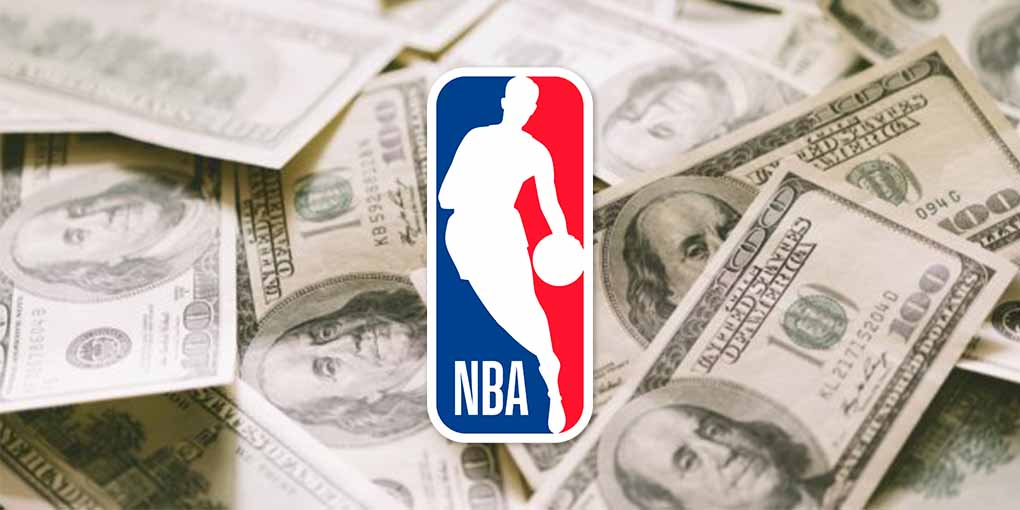

## 1) Load in Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode

## 2) Load in datasets

In [22]:
# import player stats
stats21 = pd.read_csv("NBA Player Stats_2020-2021.csv", encoding='utf-8')
stats21.drop_duplicates(subset="Player", keep= "first", inplace=True) # only keeps total for players on multiple teams

stats21.drop(columns = ['Rk', 'Player-additional'], inplace=True)
stats21.rename(columns={'Player': 'Name'}, inplace=True) # to be consistent with salary data



stats22 = pd.read_csv("NBA Player Stats_2021-2022.csv", encoding='utf-8')
stats22.drop_duplicates(subset="Player", keep= "first", inplace=True) # only keeps total for players on multiple teams

stats22.drop(columns = ['Rk', 'Player-additional'], inplace=True)
stats22.rename(columns={'Player': 'Name'}, inplace=True) # to be consistent with salary data



stats23 = pd.read_csv("NBA Player Stats_2022-2023.csv", encoding='utf-8')
stats23.drop_duplicates(subset="Player", keep= "first", inplace=True) # only keeps total for players on multiple teams

stats23.drop(columns = ['Rk', 'Player-additional'], inplace=True)
stats23.rename(columns={'Player': 'Name'}, inplace=True) # to be consistent with salary data


# import salary data
salary21 = pd.read_csv('NBA Salary_2020-2021.csv')
salary22 = pd.read_csv('NBA Salary_2021-2022.csv')
salary23 = pd.read_csv('NBA Salary_2022-2023.csv')

## 3) Clean Data

### Special Characters and Suffixes
       Doncic -> Doncic
       Bagley III -> Bagley
       T.J. -> TJ

In [23]:
# ensure that there are no names with accents or special characters
stats21['Name'] = stats21['Name'].apply(unidecode)
stats22['Name'] = stats22['Name'].apply(unidecode)
stats23['Name'] = stats23['Name'].apply(unidecode)

# remove '.' from names; T.J. -> TJ. Jae'Sean and Karl-Anthony are OK
stats21[['First Name','Last Name','suffix']] = stats21['Name'].str.split(' ', expand=True)
stats21['First Name'] = stats21['First Name'].str.replace('.','')

# remove suffixes on names like Bagley III, Trent Jr
stats21["Name"] = stats21['First Name'] + " " + stats21["Last Name"]
stats21.drop(columns = ['First Name','Last Name','suffix'], inplace=True)

#stats21=stats21.convert_dtypes() #converts to string
#stats21['Name'] = stats21['Name'].astype('string') # converts Name column to string as it was only an object
#salary21=salary21.convert_dtypes() #converts to string

C:\Users\aadamian\AppData\Local\Temp\ipykernel_3836\1671042414.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stats21['First Name'] = stats21['First Name'].str.replace('.','')


In [24]:
salary21[['First Name','Last Name','suffix']] = salary21['Name'].str.split(' ', expand=True)
salary21['First Name'] = salary21['First Name'].str.replace('.','')

# remove suffixes on names like Bagley III, Trent Jr
salary21['Name'] = salary21['First Name'] + " " + salary21['Last Name']
salary21.drop(columns = ['First Name','Last Name','suffix'], inplace=True)

salary21.drop(columns = ['#'], inplace=True)

C:\Users\aadamian\AppData\Local\Temp\ipykernel_3836\3966603535.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary21['First Name'] = salary21['First Name'].str.replace('.','')


In [25]:
salary21[['Salary_2020-2021','SalaryAdj_2020-2021']] = salary21[['Salary_2020-2021','SalaryAdj_2020-2021']].replace('[\$,]', '', regex=True).astype(float)
# alt: salary21[salary21.columns[1:]] = salary21[salary21.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
salary21

,Name,Salary_2020-2021,SalaryAdj_2020-2021
0,Stephen Curry,43006362.0,49431367.0
1,Russell Westbrook,41358814.0,47537680.0
2,Chris Paul,41358814.0,47537680.0
3,John Wall,41254920.0,47418265.0
4,James Harden,41254920.0,47418265.0
...,...,...,...
573,Cam Reynolds,33299.0,38273.0
574,Andrew White,25000.0,28734.0
575,Tyler Hall,25000.0,28734.0
576,Elijah Bryant,24611.0,28287.0


Separate quantitative data for later

In [26]:
stats21vals = stats21.iloc[:,4:]
stats21vals_simple = stats21vals[["FG%", "3P%", "2P%", "eFG%", "FT%", "TRB", "AST", "STL", "BLK", "TOV", "PTS"]]
stats21vals_basic = stats21vals_simple [["FG%", "FT%", "TRB", "AST", "STL", "BLK", "TOV", "PTS"]] # add'l distinction

### Check how many unique players there are and if each row is a unique name

In [27]:
stats21["Name"].nunique()
stats21.shape[0] #540 players, all unique

salary21["Name"].nunique()
salary21.shape[0] # 578 players, all unique - delta of 38

578

### Merge data tables and see who are the outliers and why

In [28]:
combined_full = pd.merge(salary21, stats21, on='Name', how='outer') # only 521 players are the same in both, 597 total
combined_full[combined_full['Salary_2020-2021'].isna()] #19
combined_full[combined_full['Pos'].isna()] # 57, delta of 38

,Name,Salary_2020-2021,SalaryAdj_2020-2021,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
8,Klay Thompson,35361360.0,40644227.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,Dennis Schroeder,15500000.0,17815647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,Patrick Mills,13535714.0,15557903.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Dion Waiters,12650000.0,14539867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,Louis Williams,8000000.0,9195172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,Jonathan Isaac,7362565.0,8462507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,Juan Hernangomez,6493000.0,7463032.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,Joakim Noah,6431666.0,7392535.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,DeMarre Carroll,6119676.0,7033934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,Ishmael Smith,6000000.0,6896379.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df = pd.merge(salary21, stats21, on='Name', how='inner')

Only 19 players were not merged due to some of the below issues, the rest were due to no stats (per #4)


Known issues:
1) Spelling; Schroder -> Schroeder
2) Nicknames; Ish -> Ishmael, Svi -> Sviatoslav, Juan -> Juancho, JJ -> Jose Juan, Kanter -> Freedom
3) Add'l characters; Devonte -> Devonte'


Why stats table didn't have player info:

4) Players not playing entire season; Klay missed season due to injury, Caleb Homesley - no minutes

### Fill in NA values for model

In [30]:
df[['FG%', '3P%', '2P%', 'eFG%', 'FT%']] = df[['FG%', '3P%', '2P%', 'eFG%', 'FT%']].fillna(0)
df.isna().sum()

Name                   0
Salary_2020-2021       0
SalaryAdj_2020-2021    0
Pos                    0
Age                    0
Tm                     0
G                      0
GS                     0
MP                     0
FG                     0
FGA                    0
FG%                    0
3P                     0
3PA                    0
3P%                    0
2P                     0
2PA                    0
2P%                    0
eFG%                   0
FT                     0
FTA                    0
FT%                    0
ORB                    0
DRB                    0
TRB                    0
AST                    0
STL                    0
BLK                    0
TOV                    0
PF                     0
PTS                    0
dtype: int64

## 4) Create ML Model

## Models

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [32]:
#move team column to the left to make next line of code simpler
col = df.pop('Tm')
df.insert(3, col.name, col)

In [33]:
features = df.columns[5:] # removing position as it's qualitative
target = df.columns[1] # for now, let's just focus on the one season. Use adjusted salary when doing multiple years

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [34]:
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X_train is (364, 26)
The dimension of X_test is (157, 26)


In [35]:
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model:\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model:

The train score for ridge model is 0.6912475199359394
The test score for ridge model is 0.59626306117127


In [36]:
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.6985340353303982
The test score for ls model is 0.5753790112762215


C:\Users\aadamian\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.860e+15, tolerance: 3.237e+12
  model = cd_fast.enet_coordinate_descent(


<Axes: >

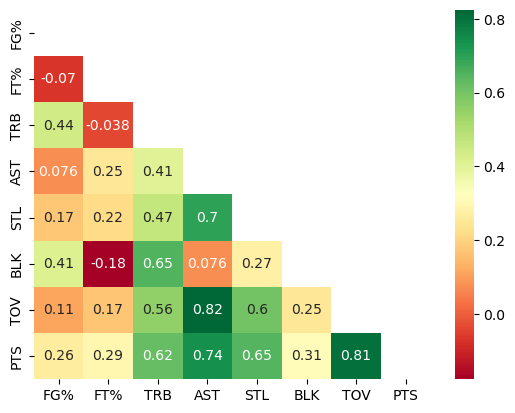

In [37]:
# interesting correlations between variables
corr = stats21vals_basic.corr()
sns.heatmap(corr, cmap = 'RdYlGn', mask = np.triu(corr), annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [38]:
def predict (df, model):
    final_results = pd.DataFrame()
    results = df[['Player']]

In [39]:
print('test')

test
